In [1]:
import glob, string
import matplotlib.pyplot as plt
from multiprocessing import Pool
import re
import numpy as np
import random
import os
import sys
%matplotlib inline

In [2]:
original_text = "This text is a mess!\nIt contains a lot of punctuation, numb3rs and missspeleds words!"

In [3]:

pattern = r'(?u)\b[A-Za-z]{3,}\b'

# Telling: 
#      (?u)     = at most one unicode char
#      \b       = the end of a word is indicated by whitespace or a non-alphanumeric, non-underscore character.
#                 matches empty string at beginning or end of word.
#      [A-Za-z] = any character from the indicated sets: ascii lower or upper chars;
#      {3,}     = at least 3 of the last match, unbounded in length: {m,n} at least m and up to n.

re.findall(pattern=pattern, string=original_text) # Neat! (note that `is`, `a`, `of`, etc. are missing!)



['This',
 'text',
 'mess',
 'contains',
 'lot',
 'punctuation',
 'and',
 'missspeleds',
 'words']

In [4]:
def count_words(subdf):
    word_lists = subdf.body.str.lower().map(lambda x: re.findall(pattern, x))
    df = pd.concat(pd.DataFrame({'word': word_list}) for word_list in word_lists)
    return df.groupby('word').size()

In [5]:
import pandas as pd

In [6]:
dirname = "/home/alberto/Dropbox/codice vario/beaker/txt"
def get_files_by_file_size(dirname, reverse=False):
    """ Return list of file paths in directory sorted by file size """

    # Get list of files
    filepaths = []
    for path, subdirs, files in os.walk(dirname):
        for name in files:
            filepaths.append(os.path.join(path, name))

    # Re-populate list with filename, size tuples
    for i in xrange(len(filepaths)):
        filepaths[i] = (filepaths[i], os.path.getsize(filepaths[i]))

    # Sort list by file size
    # If reverse=True sort from largest to smallest
    # If reverse=False sort from smallest to largest
    #filepaths.sort(key=lambda filename: filename[1], reverse=True)

    # Re-populate list with just filenames
    for i in xrange(len(filepaths)):
        filepaths[i] = filepaths[i][0]

    return filepaths

In [7]:
files=get_files_by_file_size(dirname, reverse=False)
#print files
def batch_gen(data, batch_size):
    for i in range(0, len(data), batch_size):
            yield data[i:i+batch_size]

In [8]:
def loadAnalyzedText(textLocation,aut,tit):
    #wordString = ()
    #articles=[]
    #titles=[]
    #categories=[]
    
    df = pd.DataFrame(columns=['title','author','text'])
    with open(textLocation, 'r') as f:
        line=f.read().lower()
        text=re.findall(pattern=pattern, string=line)
        
    df.loc[len(df)]=[tit,aut,text]
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    df.drop(['index'],axis=1,inplace=True)
    return df

In [9]:
df = pd.DataFrame(columns=['title','author','text'])

In [10]:
len(files)

3036

In [11]:
files[0]

'/home/alberto/Dropbox/codice vario/beaker/txt/Thomas Carlyle___On the Choice of Books.txt'

In [12]:
import time

In [13]:
t_in=time.time()
pattern2=r'\b/.*_\b'
i=0
for pages in files[:]:
    #print pages
    aut,tit=re.search(r'txt/(.*?).txt', pages).group(1).split('___')
    tmpdf=loadAnalyzedText(pages,aut.lower(),tit.lower())
    df=pd.concat([df,tmpdf])
    if i %10 ==0: 
        sys.stdout.write("\rFile number %i of %i after %f seconds" % (i,len(files),time.time()-t_in))
        sys.stdout.flush()
    i+=1

File number 3030 of 3036 after 118.247571 seconds

In [14]:
df.to_csv('gut.csv',index=False)

In [15]:
df.head()

,title,author,text
0,on the choice of books,thomas carlyle,"[the, choice, books, thomas, carlyle, life, th..."
0,gulliver's travels,jonathan swift,"[travels, into, several, remote, nations, the,..."
0,anglo-saxon britain,grant allen,"[illustration, britain, early, britain, anglo,..."
0,the great secret,edward phillips oppenheim,"[the, great, secret, phillips, oppenheim, cont..."
0,annie kilburn,william dean howells,"[annie, kilburn, novel, howells, author, india..."


In [16]:
authors=df.groupby('author').agg({'title':'count'})

In [17]:
authors.head()

,title
author,
abraham lincoln,16
agatha christie,2
albert einstein,2
aldous huxley,3
alexander pope,6


In [55]:
top_auth=authors.sort_values(by='title',ascending=False).reset_index()[:5]['author']

In [56]:
top_auth=list(top_auth)

## Authors selection
 top representing authors


In [57]:
df_sub_auth=df[df['author'].isin(top_auth)]

In [58]:
df_sub_auth

,index,title,author,text
4,0,annie kilburn,william dean howells,"[annie, kilburn, novel, howells, author, india..."
6,0,sketches and studies,nathaniel hawthorne,"[sketches, and, studies, nathaniel, hawthorne,..."
20,0,"henry james, jr",william dean howells,"[henry, james, william, dean, howells, the, ev..."
26,0,an old woman's tale,nathaniel hawthorne,"[the, doliver, romance, and, other, pieces, ta..."
31,0,"the skipper’s wooing, and the brown man’s servant",william wymark jacobs,"[the, wooing, and, the, brown, servant, jacobs..."
38,0,"a search for a secret, a novel, volume 3",george alfred henty,"[search, for, secret, novel, henty, three, vol..."
44,0,wrecked but not ruined,r m ballantyne,"[wrecked, but, not, ruined, ballantyne, set, t..."
47,0,ragged lady,william dean howells,"[ragged, lady, william, dean, howells, part, w..."
50,0,one of the 28th,george alfred henty,"[one, the, tale, waterloo, henty, author, prin..."
54,0,sketches from memory,nathaniel hawthorne,"[the, doliver, romance, and, other, pieces, ta..."


In [59]:
def NewWords(book,win):
    L=len(book)
    if L>10**4:
        L=10**4
    NewWords=[len(set(book[0:i+win])) for i in xrange(0, L, win)]
    
    return NewWords

In [60]:
df_sub_auth.loc[:,'newWordsPerWindow']= df_sub_auth.loc[:,'text'].apply(lambda x:NewWords(x,500))

In [61]:
df.reset_index(inplace=True)

In [62]:
heaps=df_sub_auth[['newWordsPerWindow','author']]

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
heaps.sort_values(by='author')

,newWordsPerWindow,author
1915,"[270, 460, 645, 774, 891, 1006, 1097, 1209, 12...",george alfred henty
588,"[298, 484, 641, 788, 923, 1021, 1130, 1259, 13...",george alfred henty
1284,"[308, 471, 635, 784, 914, 1079, 1203, 1313, 14...",george alfred henty
517,"[305, 474, 609, 751, 874, 948, 1038, 1136, 121...",george alfred henty
2551,"[286, 452, 630, 743, 835, 932, 1017, 1127, 120...",george alfred henty
2590,"[292, 509, 688, 840, 988, 1114, 1246, 1360, 14...",george alfred henty
506,"[267, 486, 633, 781, 927, 1079, 1182, 1277, 13...",george alfred henty
2595,"[292, 481, 606, 738, 867, 966, 1064, 1171, 126...",george alfred henty
1307,"[304, 519, 660, 788, 897, 1002, 1103, 1204, 13...",george alfred henty
1326,"[278, 468, 614, 740, 867, 988, 1085, 1204, 130...",george alfred henty


In [65]:
win=heaps['newWordsPerWindow']
aut=heaps['author']

In [66]:
aut=np.unique(aut)

In [67]:
from matplotlib.cm import jet

def get_n_colors(n):
    return[ jet(float(i)/n) for i in range(n) ]

colors = get_n_colors(len(aut))

In [68]:
colors

[(0.0, 0.0, 0.5, 1.0),
 (0.0, 0.29999999999999999, 1.0, 1.0),
 (0.16129032258064513, 1.0, 0.80645161290322587, 1.0),
 (0.80645161290322565, 1.0, 0.16129032258064513, 1.0),
 (1.0, 0.40740740740740755, 0.0, 1.0)]

In [69]:
color_map = dict(zip(aut, colors)) 
colorize = lambda x : color_map[x]
c = list(map(colorize, aut))

In [72]:
id_color={a:b for a,b in zip(aut,colors)}

In [73]:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in id_color.values()]

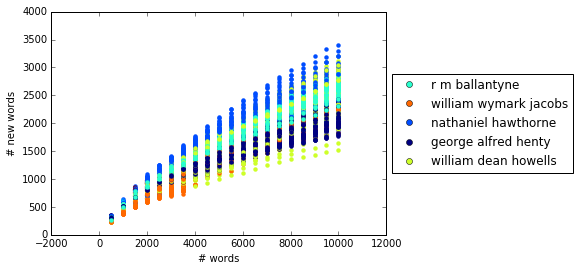

In [80]:
for plottino in heaps.values[:]:
    #print plottino
    #print len(plottino),len([(1+i)*500 in range(len(plottino))])
    
    plt.scatter([(1+i)*500 for i in range(len(plottino[0]))],plottino[0],marker='o',c=color_map[plottino[1]],linewidths=0)
lgd = plt.legend(markers, id_color.keys(), numpoints=1,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('# words')
plt.ylabel('# new words')
plt.savefig('heaps_books.pdf', bbox_inches='tight', bbox_extra_artist=[lgd])
plt.show()